In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm_vif
from math import exp
from scipy import stats as st

In [2]:
# Read data set
df_movies = pd.read_csv('df_movies.csv', index_col = 0)
df_movies.head(3)

,name,rating,rating_adj,genre,genre_adj,year,released,score,votes,director,...,budget_adj,gross,gross_adj,company,runtime,starring_cleaned,gender,"Inflation, GDP deflator cumprod",profitability,profitability_ln
0,The Shining,R,"R, NC-17 and others",Drama,Drama,1,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,...,55.715235,46.998772,137.818296,Warner Bros.,146.0,Jack Nicholson,male,2.932381,1.473620,0.905682
1,The Blue Lagoon,R,"R, NC-17 and others",Adventure,Adventure,1,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,...,13.195714,58.853106,172.579717,Columbia Pictures,104.0,Brooke Shields,male,2.932381,12.078468,2.570967
2,Star Wars: Episode V - The Empire Strikes Back,PG,G and PG,Action,Action,1,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,...,52.782854,538.375067,1578.720702,Lucasfilm,124.0,Mark Hamill,male,2.932381,28.909726,3.398184


# Descriptive Analysis

## Summary of the dataset

In [3]:
np.round(df_movies.describe(),2)

,year,score,votes,budget,budget_adj,gross,gross_adj,runtime,"Inflation, GDP deflator cumprod",profitability,profitability_ln
count,4406.00,4406.00,4406.00,3891.00,3891.00,4406.00,4406.00,4405.00,4406.00,3891.00,3891.00
mean,23.18,6.43,130950.09,44.61,59.41,122.17,161.36,109.54,1.48,7.17,0.80
std,10.36,0.92,197149.49,44.75,53.45,200.38,245.62,17.81,0.38,217.16,1.00
min,1.00,1.90,497.00,0.02,0.02,3.48,10.01,63.00,1.01,-0.93,-2.64
25%,15.00,5.90,25000.00,15.00,23.14,20.06,30.86,97.00,1.18,0.15,0.14
50%,24.00,6.50,65000.00,30.00,41.86,49.81,71.99,107.00,1.40,1.25,0.81
75%,32.00,7.10,151000.00,58.00,77.77,136.05,184.18,119.00,1.65,3.11,1.41
max,41.00,9.30,2400000.00,356.00,378.45,2847.25,3431.07,271.00,2.93,12889.39,9.46


## Revenue

### Percentage of Total Movies Within the Year

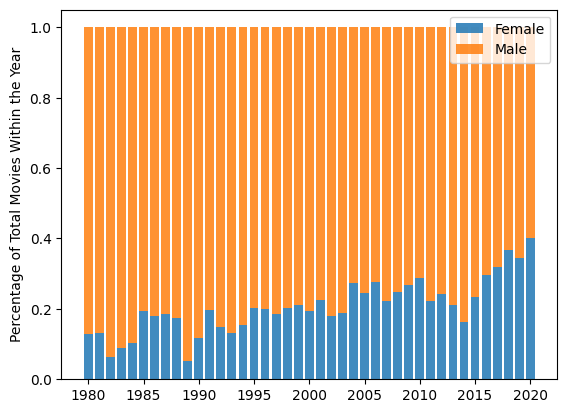

In [4]:
# Count the number of male lead movies and female lead movies for each years
year_count_male = df_movies.loc[df_movies['gender']=='male',['year','gender']].groupby(['year']).count()
year_count_female = df_movies.loc[df_movies['gender']=='female',['year','gender']].groupby(['year']).count()

# Calculate proportion of female movies in each year
year_proportion = year_count_female/(year_count_male + year_count_female)

# Plot the propotion of female movies in each year
plt.bar([i for i in range(1980,2021)] , year_proportion.iloc[:,0].values, label = 'Female', alpha = 0.85)
plt.bar([i for i in range(1980,2021)] , (1-year_proportion).iloc[:,0].values, bottom=year_proportion.iloc[:,0].values, label = 'Male', alpha = 0.85)
plt.legend(['Female','Male'])
plt.ylabel('Percentage of Total Movies Within the Year')
plt.show()

Percentage of proportion of female lead movies and male lead movies in each year. Color shows details about gender. The data is filtered on Gross_adj. which includes values greater than or equal to 10. Percents are based on each column of each pane of the table.

### Distribution of Revenue

Since the distribution of gross_adj is highly right skewed, we decided to log the data to make it normally distributed.

<AxesSubplot: ylabel='Frequency'>

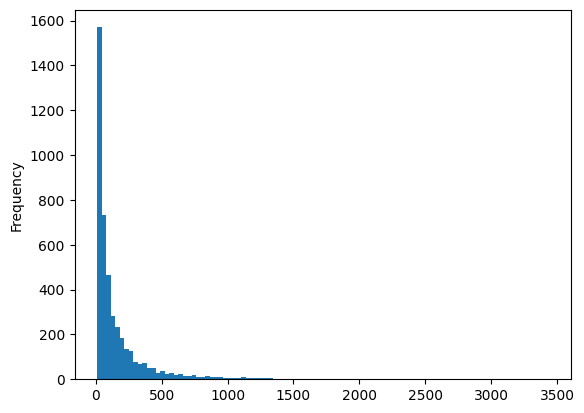

In [5]:
# not log gross revenue distribution: 
df_movies['gross_adj'].plot(kind='hist', bins = 100)

Text(0.5, 0, 'Revenue_adj (log)')

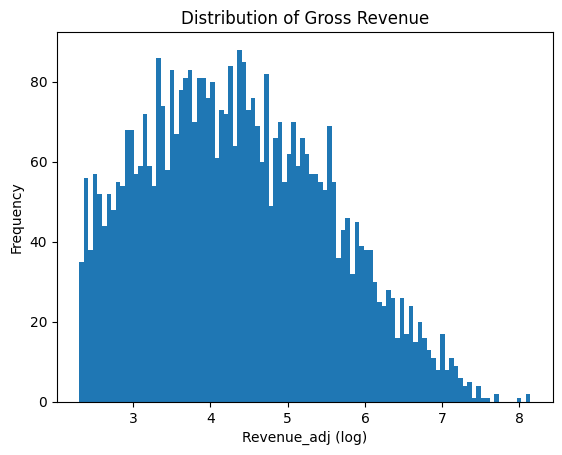

In [6]:
# Distribution of revenue after log
np.log(df_movies['gross_adj']).plot(kind='hist', bins = 100)
plt.title('Distribution of Gross Revenue')
plt.xlabel('Revenue_adj (log)')

### Box plot of revenue

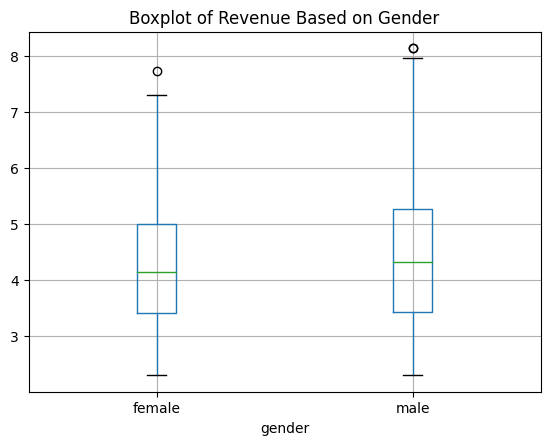

In [7]:
df_movies['log_gross_adj'] = np.log(df_movies['gross_adj'])
df_movies[['log_gross_adj','gender']].boxplot(column=['log_gross_adj'], by = 'gender')
plt.title('Boxplot of Revenue Based on Gender')
plt.suptitle('')
plt.show()

## Relationship Among Revenue and Other Variables

### Distribution of Gross Revenue by Gender

Text(0.5, 0, 'Revenue(log)')

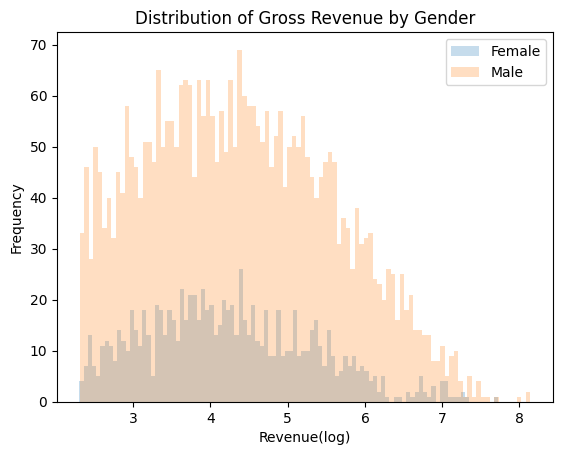

In [8]:
female = df_movies.loc[df_movies['gender'] == 'female']
male = df_movies.loc[df_movies['gender'] == 'male']

np.log(female['gross_adj']).plot(kind = 'hist', bins = 100, alpha = 0.25, label = 'Female')
np.log(male['gross_adj']).plot(kind = 'hist', bins = 100, alpha = 0.25, label = 'Male')
plt.title('Distribution of Gross Revenue by Gender')
plt.legend()
plt.xlabel('Revenue(log)')

### Revenue vs Budget

Text(0.5, 0, 'Budget(log)')

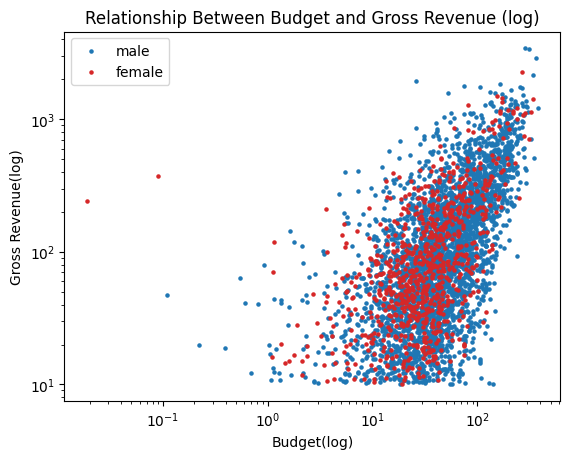

In [9]:
# Relationship between the budget and gross revenue (log)

plt.scatter(male["budget_adj"],y = male['gross_adj'], s=5)
plt.scatter(female["budget_adj"],y = female['gross_adj'], c='tab:red',s=5)
plt.legend(('male', 'female'))
plt.yscale('log')
plt.xscale('log')
plt.title('Relationship Between Budget and Gross Revenue (log)')
plt.ylabel('Gross Revenue(log)')
plt.xlabel('Budget(log)')

### Revenue vs Year

Text(0, 0.5, 'Average Gross Revenue (log)')

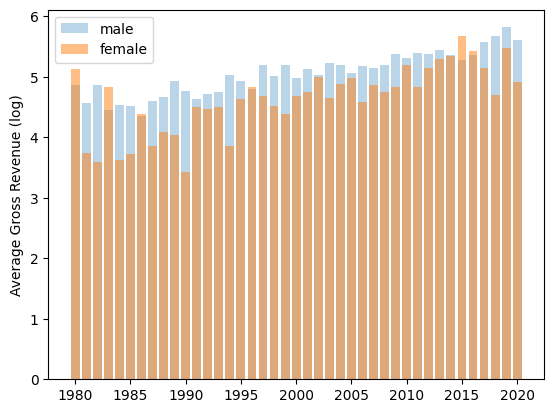

In [10]:
# We 
gross_by_year_female = female[['gross_adj','year']].groupby(['year']).mean('gross_adj')
gross_by_year_male = male[['gross_adj','year']].groupby(['year']).mean('gross_adj')

plt.bar([i for i in range(1980,2021)],np.log(gross_by_year_male).iloc[:,-1].values, align = 'center', label = 'male', alpha = 0.3)
plt.bar([i for i in range(1980,2021)],np.log(gross_by_year_female).iloc[:,-1].values, align = 'center', label = 'female',alpha = 0.5)
plt.legend()
plt.ylabel('Average Gross Revenue (log)')

### Revenue vs Score

Text(0.5, 0, 'Score')

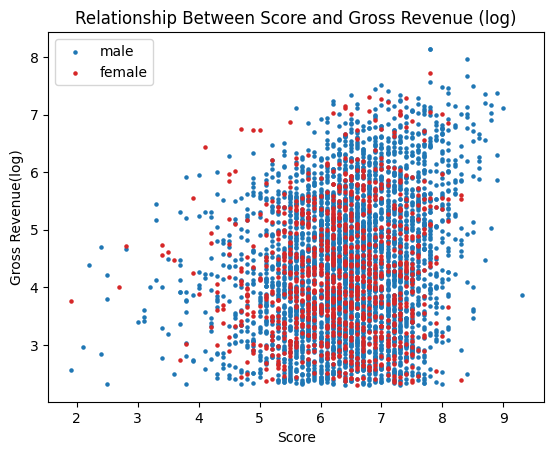

In [11]:
# Relationship between the score and gross revenue (log)

plt.scatter(male["score"],y = np.log(male['gross_adj']), s = 5)
plt.scatter(female["score"],y = np.log(female['gross_adj']), c='tab:red', s=5)
plt.legend(('male', 'female'))
plt.title('Relationship Between Score and Gross Revenue (log)')
plt.ylabel('Gross Revenue(log)')
plt.xlabel('Score')

### Revenue vs Genre

Text(0.5, 0, '')

<Figure size 4000x900 with 0 Axes>

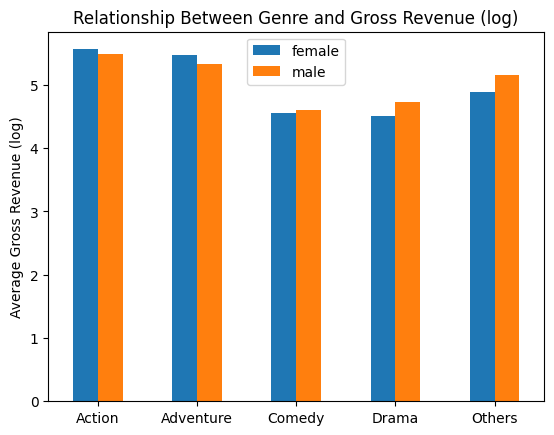

In [35]:
plt.figure(figsize=(40,9))
female_genre = female[['genre_adj','gross_adj']].groupby('genre_adj').mean()
male_genre = male[['genre_adj','gross_adj']].groupby('genre_adj').mean()
pd.concat([np.log(female_genre),np.log(male_genre)],axis=1).plot.bar(rot = 0)
plt.legend(['female','male'])
plt.ylabel('Average Gross Revenue (log)')
plt.title('Relationship Between Genre and Gross Revenue (log)')
plt.xlabel('')

### Revenue vs Rating

Text(0.5, 0, '')

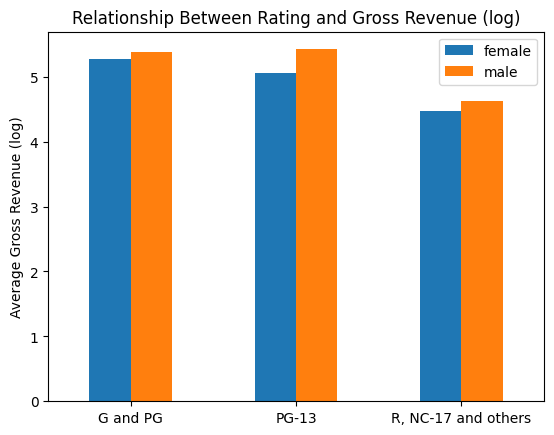

In [36]:
female_rating = female[['rating_adj','gross_adj']].groupby('rating_adj').mean()
male_rating = male[['rating_adj','gross_adj']].groupby('rating_adj').mean()
pd.concat([np.log(female_rating),np.log(male_rating)],axis=1).plot.bar(rot = 0)
plt.legend(['female','male'])
plt.ylabel('Average Gross Revenue (log)')
plt.title('Relationship Between Rating and Gross Revenue (log)')
plt.xlabel('')


# Regression Analysis

### Base without Gender

In [14]:
# This will be our base model before adding Gender
model_base_gross = sm.OLS.from_formula('np.log(gross_adj) ~ np.log(budget_adj) + year + score + rating_adj + genre_adj', df_movies)
print(model_base_gross.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     340.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:14   Log-Likelihood:                -4990.7
No. Observations:                3891   AIC:                         1.000e+04
Df Residuals:                    3881   BIC:                         1.006e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Adding Gender into the base model

In [15]:
# Adding gender into the base model
model_1_gross = sm.OLS.from_formula('np.log(gross_adj) ~ gender + np.log(budget_adj) + year + score + rating_adj + genre_adj', df_movies)
print(model_1_gross.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     308.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:14   Log-Likelihood:                -4984.8
No. Observations:                3891   AIC:                             9992.
Df Residuals:                    3880   BIC:                         1.006e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Add Gender * np.log(budget_adj)

In [16]:
# Add Gender * np.log(budget_adj)
model_2_gross = sm.OLS.from_formula('np.log(gross_adj) ~ gender*np.log(budget_adj) + year + np.log(budget_adj) + year + score + rating_adj + genre_adj', df_movies)
model_2_gross_fit = model_2_gross.fit()
print(model_2_gross_fit.summary())

male_ln_budget_adj_max = np.log(df_movies[df_movies["gender"]=="male"]["budget_adj"]).max()
male_coeff = model_2_gross_fit.params["gender[T.male]"]
male_budget_coeff = model_2_gross_fit.params["gender[T.male]:np.log(budget_adj)"]

print("\nMaximum value of budget for male movies is {:} millions".format(round(exp(male_ln_budget_adj_max), 2)))
print("At maximum budget, male will generate {:.2%} more revenue than female".format(exp(male_coeff + (male_ln_budget_adj_max * male_budget_coeff))-1))
print("Male will generate more revenue than female when the budget is {:} millions or higher".format(round(exp(-male_coeff/male_budget_coeff), 2)))


                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     281.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:14   Log-Likelihood:                -4979.8
No. Observations:                3891   AIC:                             9984.
Df Residuals:                    3879   BIC:                         1.006e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Add Gender * score

In [17]:
# Add Gender * score
model_4_gross = sm.OLS.from_formula('np.log(gross_adj) ~ gender*np.log(budget_adj) + np.log(budget_adj) + year + score + rating_adj + genre_adj + score*gender', df_movies)
print(model_4_gross.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     261.7
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:14   Log-Likelihood:                -4968.2
No. Observations:                3891   AIC:                             9962.
Df Residuals:                    3878   BIC:                         1.004e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [18]:
print('female-lead movies:')
print(female['score'].describe())
print('male-lead movies:')
print(male['score'].describe())

female-lead movies:
count    945.000000
mean       6.303915
std        0.875197
min        1.900000
25%        5.800000
50%        6.400000
75%        6.900000
max        8.300000
Name: score, dtype: float64
male-lead movies:
count    3461.000000
mean        6.465704
std         0.929696
min         1.900000
25%         5.900000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64


In [19]:
# t-test based scores of male-lead movies and female-lead movies)
np.round(st.ttest_ind(male['score'].dropna(), female['score'].dropna(), equal_var=False),4)

array([4.9686, 0.    ])

### Add Gender * year

In [20]:
# Add Gender * year
model_gender_interaction = sm.OLS.from_formula('np.log(gross_adj) ~ gender + np.log(budget_adj) + year + score + rating_adj + genre_adj + gender*year', df_movies)
print(model_gender_interaction.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     280.5
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:15   Log-Likelihood:                -4983.6
No. Observations:                3891   AIC:                             9991.
Df Residuals:                    3879   BIC:                         1.007e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Add Gender * genre

In [21]:
# Add Gender * genre
model_4_gross = sm.OLS.from_formula('np.log(gross_adj) ~ gender + np.log(budget_adj) + year + score + rating_adj + genre_adj*gender', df_movies)
print(model_4_gross.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(gross_adj)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:25:15   Log-Likelihood:                -4983.5
No. Observations:                3891   AIC:                             9997.
Df Residuals:                    3876   BIC:                         1.009e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e650921-8e2a-4c48-bd86-ee489799e499' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>